In [1]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
from scipy.special import comb
from scipy.stats import binom
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

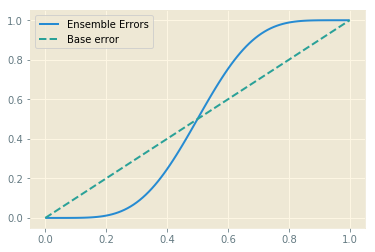

In [2]:
# %%
error_range = np.arange(0.0,1.01,0.01)
n_classifier = 11
np.ceil(n_classifier/2)
ens_errors=binom.sf(n_classifier - np.ceil(n_classifier/2),n_classifier,error_range)
plt.plot(error_range,ens_errors,linewidth=2,label= 'Ensemble Errors')
plt.plot(error_range,error_range,linestyle = '--',label = 'Base error')
plt.legend(loc='upper left')
plt.show()

In [3]:
iris = datasets.load_iris()
X,y = iris.data[50:,[1,2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1,stratify =y)

### Classfying individual 

In [4]:
clf1 = LogisticRegression(penalty='l2',C=0.001,random_state=1,solver='lbfgs')
clf2 = DecisionTreeClassifier(max_depth=1,random_state=1)
clf3 = KNeighborsClassifier(n_neighbors=1)
pipeline1 = Pipeline([['sc1',StandardScaler()],['clf',clf1]])
pipeline2 = Pipeline([['sc2',StandardScaler()],['clf',clf3]])
clf_labels = ['Logistic_Regression','DecisionTree','KNeighborsClassifier']

for label,clf in zip(clf_labels,[pipeline1,clf2,pipeline2]):

    scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
    print('ROC Score for [%s] %0.2f +/- %0.2f'% (label,scores.mean(),scores.std()))



ROC Score for [Logistic_Regression] 0.87 +/- 0.17
ROC Score for [DecisionTree] 0.89 +/- 0.16
ROC Score for [KNeighborsClassifier] 0.88 +/- 0.15
